In [5]:
import matplotlib.pyplot as plt
from pycalphad import Database, variables as v
from scheil import simulate_scheil_solidification

Load the database file for this system

In [6]:
%%time
# setup the simulation parameters
dbf = Database('alzn_mey.tdb')
comps = ['AL', 'ZN', 'VA']
phases = sorted(dbf.phases.keys())

liquid_phase_name = 'LIQUID'
initial_composition = {v.X('ZN'): 0.3}
start_temperature = 850

CPU times: user 203 ms, sys: 17.6 ms, total: 220 ms
Wall time: 227 ms


In [7]:
%%time
# perform the simulation
sol_res = simulate_scheil_solidification(dbf, comps, phases, initial_composition, start_temperature, step_temperature=1.0)

CPU times: user 14.6 s, sys: 470 ms, total: 15.1 s
Wall time: 15.2 s


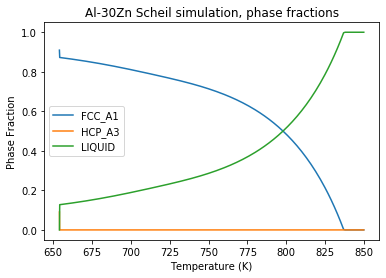

CPU times: user 186 ms, sys: 10.5 ms, total: 196 ms
Wall time: 205 ms


In [8]:
%%time
# plot the result
for phase_name, amounts in sol_res.cum_phase_amounts.items():
    plt.plot(sol_res.temperatures, amounts, label=phase_name)
plt.plot(sol_res.temperatures, sol_res.fraction_liquid, label='LIQUID')
plt.ylabel('Phase Fraction')
plt.xlabel('Temperature (K)')
plt.title('Al-30Zn Scheil simulation, phase fractions')
plt.legend(loc='best')
plt.show()